In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import cv2

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [2]:
# wczytanie zdjęcia
img = cv2.imread("/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple A/Apple 1.png")



<Figure size 1440x1440 with 0 Axes>

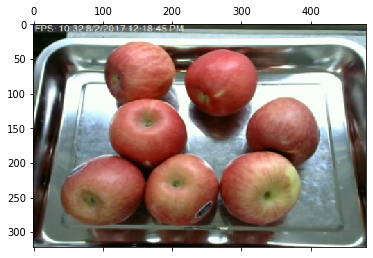

In [3]:
# Display the resulting frame
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
# plt.gray()
plt.matshow(img)
plt.show()

In [4]:
import glob

In [5]:
apple_a= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple A/*.png')

In [6]:
#apple_b= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple B/*.png')

In [7]:
#apple_c= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple C/*.png')

In [8]:
#apple_d= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple D/*.png')

In [9]:
apple_e= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Banana/*.png')

In [10]:
#'/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple E/*.png')

In [11]:
#apple_f= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple F/*.png')

In [12]:
#applesAll= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Total Number of Apples/*.png')

In [13]:
# n_applesAll = len(apples)
# n_applesAll

In [14]:
apples = apple_a+apple_e
n_apples = len(apples)
n_apples

3719

In [15]:
img_height, img_width = 150, 150

In [16]:
apples_array = np.empty((n_apples, img_height, img_width, 3))
apples_list = []

In [17]:
for i, path in enumerate(apples):
    image = cv2.imread(path)
    if image.shape[:-1] != (img_height, img_width):
        image = cv2.resize(image, (img_width, img_height))
        
    apples_array[i] = image

In [ ]:
for i, path in enumerate(apples):
    image = cv2.imread(path)
    if image.shape[:-1] != (img_height, img_width):
        image = cv2.resize(image, (img_width, img_height))
    apples_list.append(image)

In [ ]:
len(apples_list)

In [ ]:
apples_array_bis = np.stack(apples_list)

In [ ]:
apples_array_bis.shape

In [ ]:
# przypisanie apple_array do x 
x = apples_array

In [ ]:
img = cv2.cvtColor(apples_array_bis[1000], cv2.COLOR_BGR2RGB)
plt.matshow(img)
plt.axis('off')
plt.show()

In [ ]:
applesPaths = [apple_a,apple_e]

In [ ]:
# wyrzucamy, bo nie wiemy jaki jest cel tego 
# x = np.zeros((1356, 150, 150, 3)) 
y = np.zeros(3719,)

In [ ]:
idx = 0
for i in range(len(applesPaths)):
    appleClass = i
    for path in applesPaths[i]:
        # wczytywanie
        # x mamy już gotowy wyżej, dlatego wyrzucone
       # x[idx] = n_apples
        y[idx] = appleClass
        idx += 1

In [ ]:
print(x.shape)
y = y.reshape(-1,1)
y.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=42, stratify=y)

In [ ]:
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

In [ ]:
# x_train

In [ ]:
unique, counts = np.unique(y, return_counts=True)
klasy = dict(zip(unique, counts))
print('Klasa 0: {0}\nKlasa 1: {1}'.format(klasy[0],klasy[1]))

In [ ]:
# unique, counts = np.unique(x, return_counts=True)
# dict(zip(unique, counts))

In [ ]:
# normalizacja danych
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# kontener na model
model = tf.keras.models.Sequential()
# pierwsza warstwa zmienia kształ na odpowiadający pod konwolucje, czyli 4D, posiada również rozmiar wejścia
model.add(tf.keras.layers.Input(shape=(150, 150, 3)))
# pierwsza ukryta, konwolucyjna
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=[3,3], padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPool2D())
# druga ukryta, konwolucyjna
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=[3,3], padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPool2D())
# trzecia ukryta, konwolucyjna
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPool2D())
# spłaszczamy pod warstwy fully connected(Dense)
model.add(tf.keras.layers.Flatten())
# czwarta ukryta fully connetced
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))
# wyjściowa, zadaniem jest klasyfikacja 2 klas
model.add(tf.keras.layers.Dense(2))
# aktywacja jako softmax, aby uzyskać rozkład prawdopodbieństwa
model.add(tf.keras.layers.Softmax())
# żadnego dropout'u, nie chcemy abym nam wyzerowało wartość

In [ ]:
model.summary()

In [ ]:
# wybieramy optimalizator, polecam pobawić się z różnymi typami oraz różnymi wartościami learning rate'u
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# kompilujemy
model.compile(optimizer=opt, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=["accuracy"])

In [ ]:
# trenujemy, warto sprawdzić z różną wielkością batcha i epok
model.fit(x_train, y_train, epochs=5, verbose=1)
print("done")

In [ ]:
# testowanie
coef = model.evaluate(x_test, y_test)

In [ ]:
print('loss: {0}:\naccuracy: {1}'.format(coef[0], coef[1]))

In [ ]:
y_pred = tf.nn.softmax(model.predict(x_test)).numpy()
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))) 

In [ ]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))